## Camera Calibration

### Finding calibration matrix and distortion coefficients

>This section defines functions for finding the calibration matrix and distortion coefficients of given calibration images in the ```camera_cal``` directory.

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

from enum import Enum

In [2]:
class CoefficientsT(Enum):
    RET=0,
    MTX=1,
    DIST=2

coeff_ret = CoefficientsT.RET
coeff_mtx = CoefficientsT.MTX
coeff_dist = CoefficientsT.DIST

HorizontalCount = 0
VerticalCount = 0

In [3]:
Coefficients = {
    coeff_ret : None,
    coeff_mtx : None,
    coeff_dist : None
}

In [4]:
class ConversionT(Enum):
    GRAY = 0,
    HLS = 1
    HSV = 2,
    XYZ = 3,
    YCRCB = 4,
    LAB = 5,
    LUV = 6
    
class Image:
    
    def __init__(self, img):
        self.img = img
        self.GRAY = ConversionT.GRAY
        self.HLS = ConversionT.HLS
        self.HSV = ConversionT.HSV
        self.XYZ = ConversionT.XYZ
        self.YCRCB = ConversionT.YCRCB
        self.LAB = ConversionT.LAB
        self.LUV = ConversionT.LUV
            
    def Convert(self, newSpaceT):
        
        switch = {
            self.GRAY: cv2.cvtColor(self.img, cv2.COLOR_RGB2GRAY),
            self.HLS: cv2.cvtColor(self.img, cv2.COLOR_RGB2HLS),
            self.HSV: cv2.cvtColor(self.img, cv2.COLOR_RGB2HSV),
            self.XYZ: cv2.cvtColor(self.img, cv2.COLOR_RGB2XYZ),
            self.YCRCB: cv2.cvtColor(self.img, cv2.COLOR_RGB2YCrCb),
            self.LAB: cv2.cvtColor(self.img, cv2.COLOR_RGB2Lab),
            self.LUV: cv2.cvtColor(self.img, cv2.COLOR_RGB2Luv),
            
        }
        
        return switch.get(newSpaceT, self.img)
    
    def RGBChannels(self, channel=None):
        
        if channel is None:
            
            return (self.img[:, :, 0], self.img[:, :, 1], self.img[:, :, 2])
            
        else:
            
            return self.img[:, :, channel]
        
        
    def HLSChannels(self, channel=None):
        
        hlsimg = self.Convert(self.HLS)
        
        if channel is None:
            
            return (hlsimg[:, :, 0], hlsimg[:, :, 1], hlsimg[:, :, 2])
            
        else:
        
            return hlsimg[:, :, channel]
        
    def HSVChannels(self, channel=None):
        
        hsvimg = self.Convert(self.HSV)
        
        if channel is None:
            
            return (hsvimg[:, :, 0], hsvimg[:, :, 1], hsvimg[:, :, 2])
            
        else:
        
            return hsvimg[:, :, channel]
    '''
    ColorSpace - The class type for color spaces to use, default is RGB
                 - Gray
                 - HLS
                 - HVS
                 - XYZ
                 - YCRCB
                 - LAB
                 - LUV
                 
    Example: imageObj = Image(img)
             imageObj.Threshold(ColorSpace=imageObj.HVS)
             
             # This would return a tuple with 3 images for each channel
             
    thres - The threshold that should be applied across the channels of the image. This can take on two forms:
            
            Uneven - Supplying seperate thresholds for each channel in a tuple such as
                     ((50, 75), (44, 80), None), which would apply (50, 75) to channel 1 and so on.
            Even - Supplying a single tuple will apply the threshold to all channels supplied
                   (50, 75)
                   
    channels - The tuple that determines which channels to apply a threshold to or to return. This is not used when
               supplying an uneven threshold tuple as the channels can be derived from the values.
               
               If no channels are supplied the default value of None is used which assumes this means all channels.
               
    Examples:
    
    # Instantiate the class using an RGB image
    
    imageObj = Image(img)
    
    # To get all the channels of the rgb image
    
    channels = imageObj.Threshold()
    r = channels[0]
    g = channels[1]
    b = channels[2]
    
    # To get only the second channel
    # this will return an array with the image(s). The values passed for the channels desired do not matter as long 
    # as they are defined.
    # The result will be an array which will contain an image for each respective channel passed
    
    channel = imageObj.Threshold(channels=(None, 0, None))[0]
    
    # To apply uneven thresholds
    # The result is a tuple with the following values:
    # 0 - The full image with the thresholds applied
    # 1 - Image of the first channel with threshold applied
    # 2 - Image of the second channel with threshold applied
    # 3 - Image of the third channel with threshold applied
    
    ch1_thres = (100, 200)
    ch2_thres = None
    ch3_thres = (50, 80)
    
    img_thres = imageObj.Threshold(thres=(ch1_thres, ch2_thres, ch3_thres))
    
    # To apply a threshold to a single channel
    # The result will be an array which will contain an image for each respective channel passed
    # Notice how the threshold passed is a single tuple, not a tuple of tuples.
    
    img_thres = imageObj.Threshold(channels=(None, None, 0), thres=(50, 100))[0]
    
    '''
    def Threshold(self, ColorSpace = None, thres = None, channels = None):
        
        returns = []
        
        if ColorSpace == None:
            
            colorImg = self.img
            
        else:
            
            colorImg = self.Convert(ColorSpace)
    
    
        # Have converted image now check the channel and thres parameters
        
        if thres is None:
            
            # Requested all color channels
            if channels is None:
                
                return (colorImg[:, :, 0], colorImg[:, :, 1], colorImg[:, :, 2])
                
            else:
                
                if channels[0] is not None:
                    
                    returns.append(colorImg[:, :, 0])
                    
                if channels[1] is not None:
                    
                    returns.append(colorImg[:, :, 1])
                    
                if channels[2] is not None:
                    
                    returns.append(colorImg[:, :, 2])
                    
                return returns
            
        else:
            
            # Apply uneven thresholds across respective channels
            
            if len(thres) > 0:
                
                thres_ch1 = thres[0]
                thres_ch2 = thres[1]
                thres_ch3 = thres[2]
                
                print(thres_ch1[0])
                
                mask = None
                
                if thres_ch1 is not None:
                    
                    # Apply thresholding to channel 1
                    ch1 = colorImg[:, :, 0]
                    mask_ch1 = np.zeros_like(ch1)
                    mask_ch1[(ch1 <= thres_ch1[0]) & (ch1 >= thres_ch1[1])] = 1
                    returns.append(mask_ch1)
                    
                    mask = mask_ch1
                    
                if thres_ch2 is not None:
                    
                    # Apply thresholding to channel 2
                    ch2 = colorImg[:, :, 0]
                    mask_ch2 = np.zeros_like(ch2)
                    mask_ch2[(ch2 <= thres_ch2[0]) & (ch2 >= thres_ch2[1])] = 1
                    returns.append(mask_ch2)
                    
                    if mask is None:
                        
                        mask = mask_ch2
                        
                    else
                    
                        mask = mask & mask_ch2
                    
                if thres_ch3 is not None:
                    
                    # Apply thresholding to channel 3
                    ch3 = colorImg[:, :, 0]
                    mask_ch3 = np.zeros_like(ch3)
                    mask_ch3[(ch3 <= thres_ch3[0]) & (ch3 >= thres_ch3[1])] = 1
                    returns.append(mask_ch3)
                    
                    if mask is None:
                        
                        mask = mask_ch3
                        
                    else
                    
                        mask = mask & mask_ch3
                
                returns.insert(0, mask)
                
                return returns
                
            # Apply the same threshold across 1 or more channels
            else:
                
                # Apply across all channels
                if channels is None:
                    
                    ch1 = colorImg[:, :, 0]
                    ch2 = colorImg[:, :, 1]
                    ch3 = colorImg[:, :, 2]
                    
                    mask_ch1 = np.zeros_like(ch1)
                    mask_ch2 = np.zeros_like(ch2)
                    mask_ch3 = np.zeros_like(ch3)
                    
                    mask_ch1[(thres <= ch1) & (thres >= ch1)] = 1
                    mask_ch2[(thres <= ch2) & (thres >= ch2)] = 1
                    mask_ch3[(thres <= ch3) & (thres >= ch3)] = 1
                    
                    mask = mask_ch1 & mask_ch2 & mask_ch3
                    
                    return (mask, mask_ch1, mask_ch2, mask_ch3)
                    
                    
                # Apply to specific channels
                else:
                    
                    mask = None
                    
                    if channels[0] is not None:
                        
                        ch1 = colorImg[:, :, 0]
                        mask_ch1 = np.zeros_like(ch1)
                        mask_ch1[(thres <= ch1) & (thres >= ch1)] = 1
                        
                        mask = mask_ch1
                        
                        returns.append(mask_ch1)
                        
                        
                    if channels[1] is not None:
                        
                        ch2 = colorImg[:, :, 1]
                        mask_ch2 = np.zeros_like(ch2)
                        mask_ch2[(thres <= ch2) & (thres >= ch2)] = 1
                        
                        returns.append(mask_ch2)
                        
                        if mask is None:
                            
                            mask = mask_ch2
                            
                        else:
                            
                            mask = mask & mask_ch2
                        
                        
                    if channels[2] is not None:
                        
                        ch3 = colorImg[:, :, 2]
                        mask_ch3 = np.zeros_like(ch3)
                        mask_ch3[(thres <= ch3) & (thres >= ch3)] = 1
                        
                        if mask is None:
                            
                            mask = mask_ch3
                            
                        else:
                            
                            mask = mask & mask_ch3
                        
                        returns.append(mask_ch3)
                        
                    returns.insert(0, mask)
                        
                    return returns

In [5]:
def Points(images, horizontal, vertical):
    
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((vertical * horizontal, 3), np.float32)
    objp[:,:2] = np.mgrid[0:horizontal, 0:vertical].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    
    for img in images.values():
        
        # Get images
        #img = cv2.imread(fname)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img_size = (img.shape[1], img.shape[0])

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (horizontal, vertical), None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

    return img_size, objpoints, imgpoints
    


***

### Undistortion

>This section defines functions for undistorting an image based on the calibration discovered in the previous section.

In [6]:
def Calibrate(calImages, horizontalCount, verticalCount):
    
    img_size, objpoints, imgpoints = Points(calImages, horizontalCount-1, verticalCount-1)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    
    Coefficients[coeff_ret] = ret
    Coefficients[coeff_mtx] = mtx
    Coefficients[coeff_dist]  = dist
    
    HorizontalCount = horizontalCount
    VerticalCount = verticalCount

In [7]:
def UndistortAll(test_images, cal_images, horizontal, vertical):
    
    undistorted = []
    
    ret, mtx, dist = Get_Matrix(cal_images, horizontal, vertical)
    
    for fname in test_images:
    
        img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
        dst = cv2.undistort(img, mtx, dist, None, mtx)

        undistorted.append(dst)
        
    return undistorted
        

In [8]:
def UndistortLoadedImage(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return cv2.undistort(img, Coefficients[coeff_mtx], Coefficients[coeff_dist], None, Coefficients[coeff_mtx])
    

In [9]:
def UndistortUnloadedImage(image):
    img = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    return cv2.undistort(img, Coefficients[coeff_mtx], Coefficients[coeff_dist], None, Coefficients[coeff_mtx])

***

## Manipulation

### Apply color and gradient thresholds

>This section defines functions for applying color and gradient thresholds to an undistorted image to find the lane lines.

In [10]:
def rgb_thres(img, thres=(0, 255)):
    
    r = img[:, :, 0]
    g = img[:, :, 1]
    b = img[:, :, 2]
    
    if thres is None:
        return (r, g, b)
    
    mask_r = np.zeros_like(r)
    mask_g = np.zeros_like(g)
    mask_b = np.zeros_like(b)
    
    mask_r[ (thres[0] <= r) & (thres[1] >= r) ] = 1
    mask_g[ (thres[0] <= g) & (thres[1] >= g) ] = 1
    mask_b[ (thres[0] <= b) & (thres[1] >= b) ] = 1
    
    return (mask_r, mask_g, mask_b)

In [11]:
def hls_thres(img, thres=(0, 255)):
    
    hls_img = img
    
    h = hls_img[:, :, 0]
    l = hls_img[:, :, 1]
    s = hls_img[:, :, 2]
    
    if thres is None:
        return (h, l, s)
    
    mask_h = np.zeros_like(h)
    mask_l = np.zeros_like(l)
    mask_s = np.zeros_like(s)
    
    mask_h[ (thres[0] <= h) & (thres[1] >= h) ] = 1
    mask_l[ (thres[0] <= l) & (thres[1] >= l) ] = 1
    mask_s[ (thres[0] <= s) & (thres[1] >= s) ] = 1
    
    return (mask_r, mask_g, mask_b)

In [12]:
def hsv_thres(img, thres=(0, 255)):
    
    hsv_img = img
    
    h = hsv_img[:, :, 0]
    s = hsv_img[:, :, 1]
    v = hsv_img[:, :, 2]
    
    if thres is None:
        return (h, s, v)
    
    mask_h = np.zeros_like(h)
    mask_s = np.zeros_like(s)
    mask_v = np.zeros_like(v)
    
    mask_h[ (thres[0] <= h) & (thres[1] >= h) ] = 1
    mask_s[ (thres[0] <= s) & (thres[1] >= s) ] = 1
    mask_v[ (thres[0] <= v) & (thres[1] >= v) ] = 1
    
    return (mask_r, mask_g, mask_b)

***

### Birds-eye view perspective transform

>This section defines functions for transforming the perspective of an image to birds-eye.

***

## Find lane line pixels

### Sliding windows

>In this section the sliding window method of lane pixel detection is implemented.

***

### Search from prior

>In this section the search from prior method of lane pixel detection is implemented.

***

### Convolution

>In this section the convolution method of lane pixel detection is implemented.

***

## Polynomial Fitting

### Fit 2nd degree polynomial to left and right lane lines

>This section defines functions for fitting a second order polynomial to the lane pixels for left and right lanes discovered from the previous section.

***

## Lane Curvature

### Curvature

>**This is a description**

***

### Center deviation

>**This is a description**

***

## Lane Boundary Annotation

### Annotate lane boundaries

>**This is a description**

***

## Helpers

>This section defines helper functions for various needs

In [13]:
def GetImagesOS(rootDir, validExtensions):
    
    '''
    Description: Finds all image files in the rootDir with valid extensions and returns the following dictionaries:
                 paths - {Image filename without extension, Full path to image}
                 extensions - {Image filename without extension, Image extension}
                 imgs - {Image filename without extension, matplotlib.image object of the image}
    '''
    
    paths = {}
    extensions = {}
    imgs = {}
    indexes = []
    
    if(rootDir == ''):
        files = os.listdir(".")
    else:
        files = os.listdir(rootDir)
    
    for file in files:
        
        if(rootDir == ''):
            
            if(os.path.isfile(".\\" + file)):
                
                ext = file[-3:]
                
                if ext in validExtensions:
                    
                    filename = file[:len(file)-4]
                    indexes.append(filename)
                    paths[filename] = ".\\" + file
                    extensions[filename] = ext
                    imgs[filename] = cv2.imread(".\\" + file)
            
        else:
            
            if os.path.isfile(rootDir + '\\' + file):
                
                ext = file[-3:]
                
                if ext in validExtensions:
                    
                    filename = file[:len(file)-4]
                    indexes.append(filename)
                    paths[filename] = rootDir + "\\" + file
                    extensions[filename] = ext
                    imgs[filename] = cv2.imread(rootDir + "\\" + file)
                    
    return indexes, paths, extensions, imgs

In [14]:
def GetImagesGlob(rootDir, filename, extension):
    
    if rootDir == '':
        return glob.glob(".\\" + filename + "*." + extension)
    else:
        return glob.glob(rootDir + "\\" + filename + "*." + extension)

In [15]:
def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [16]:
def Plot(images, titles, dimensions, plotSize, textProps):
    
    '''
    Description: Creates a plot of n images
    
    Arguments: images - The 1d list of images, total must match the product of the dimensions
                    (img1, img2, ...)
                    
               titles - The 1d list of titles corresponding to the same index in images
                   (title1, title2, ...)
                   
               dimensions - The row x column values, the product must match the image count
                   (row, column)
                   
               plotSize - The width and height of the plot
                   (width, height)
                   
               textProps - Contains various properties for font sizes, weights, etc and is in the form
                   (
                       (
                           Title font size, 
                           Title font weight, 
                           Title padding
                       ),
                       
                       (
                           X axis label,
                           X axis font size, 
                           X axis font weight, 
                           X axis label padding, 
                           X axis tick fontsize, 
                           X axis tick font weight
                       ),
                       (
                           Y axis label,
                           Y axis font size, 
                           Y axis font weight, 
                           Y axis label padding, 
                           Y axis tick fontsize, 
                           Y axis tick font weight
                       )
                   )
    
    Returns:
        Bool - Weather the operation succeeded
        Msg  - The error message if the operation failed
    
    '''
    
    if type(images) == np.ndarray:
        
        singleImage = True
        
    else:
        if len(images) != dimensions[0] * dimensions[1]:
    
            return False, "Supplied {} images but matrix is {}x{} which requires {} images".format(
            len(images), 
            dimensions[0], 
            dimensions[1],
            dimensions[0] * dimensions[1]
        )
    
        singleImage = False
        
    title = textProps[0]
    xaxis = textProps[1]
    yaxis = textProps[2]
    
    if not singleImage:
    
        try:

            f, ax = plt.subplots(dimensions[0], dimensions[1], figsize=plotSize, constrained_layout=True)

            figureIndex = 0
                
            for c in range(0, dimensions[1]):
                for r in range(0, dimensions[0]):
                    
                    try:
                        
                        plot = ax[r, c]
                        plot.set_title(titles[figureIndex], pad=title[2], fontweight=title[1], fontsize=title[0])
                        plot.set_xlabel(xaxis[0], labelpad=xaxis[3], fontweight=xaxis[2], fontsize=xaxis[1])
                        plot.set_ylabel(yaxis[0], labelpad=yaxis[3], fontweight=yaxis[2], fontsize=yaxis[1])

                        for tick in plot.xaxis.get_major_ticks():
                            tick.label.set_fontsize(xaxis[4])
                            tick.label.set_fontweight(xaxis[5])
                        for tick in plot.yaxis.get_major_ticks():
                            tick.label.set_fontsize(yaxis[4])
                            tick.label.set_fontweight(yaxis[5])

                        plot.imshow(images[figureIndex])
                        plot.show()
                            
                        
                    except:
                        continue
                        
                    figureIndex += 1

            f.tight_layout()
            #plt.subplots_adjust(left=margins[0], top=margins[1], right=margins[2], bottom=margins[3])
            return True, ""

        except Exception as ex:
            return False, ex
        
    else:
        try:
            f, ax = plt.subplots(1, 1, figsize=plotSize, constrained_layout=True)
            
            ax.set_title(titles, fontsize=fontSize, pad=18)
            ax.set_xlabel("X", labelpad=50, fontsize=(fontSize * 0.8))
            ax.set_ylabel("Y", labelpad=50, fontsize=(fontSize * 0.8))
            
            for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(fontSize * 0.55)
            for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(fontSize * 0.55)
            
            ax.imshow(images)
            
            return True, ""
        
        except Exception as ex:
            return False, ""

***

## Implementation

>This section shows the pipeline implementation using the functions defined above.

In [17]:
# Make a list of calibration images
calIndexes, calPaths, calExtensions, calImages = GetImagesOS('camera_cal', ('jpg', 'png'))
# Make a list of test images
testIndexes, testPaths, testExtensions, testImages = GetImagesOS('test_images', ('jpg', 'png'))

In [18]:
def Lane(img):
    
    undist = UndistortLoadedImage(testImages[testIndexes[2]])
    
    return undist
    
    
#     f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
#     f.tight_layout()
#     ax1.imshow(img)
#     ax1.set_title('Original Image', fontsize=50)
#     ax2.imshow(undistorted[currImage])
#     ax2.set_title('Undistorted Image', fontsize=50)
#     plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
        

## Testing RGB, HLS, and HSV color spaces

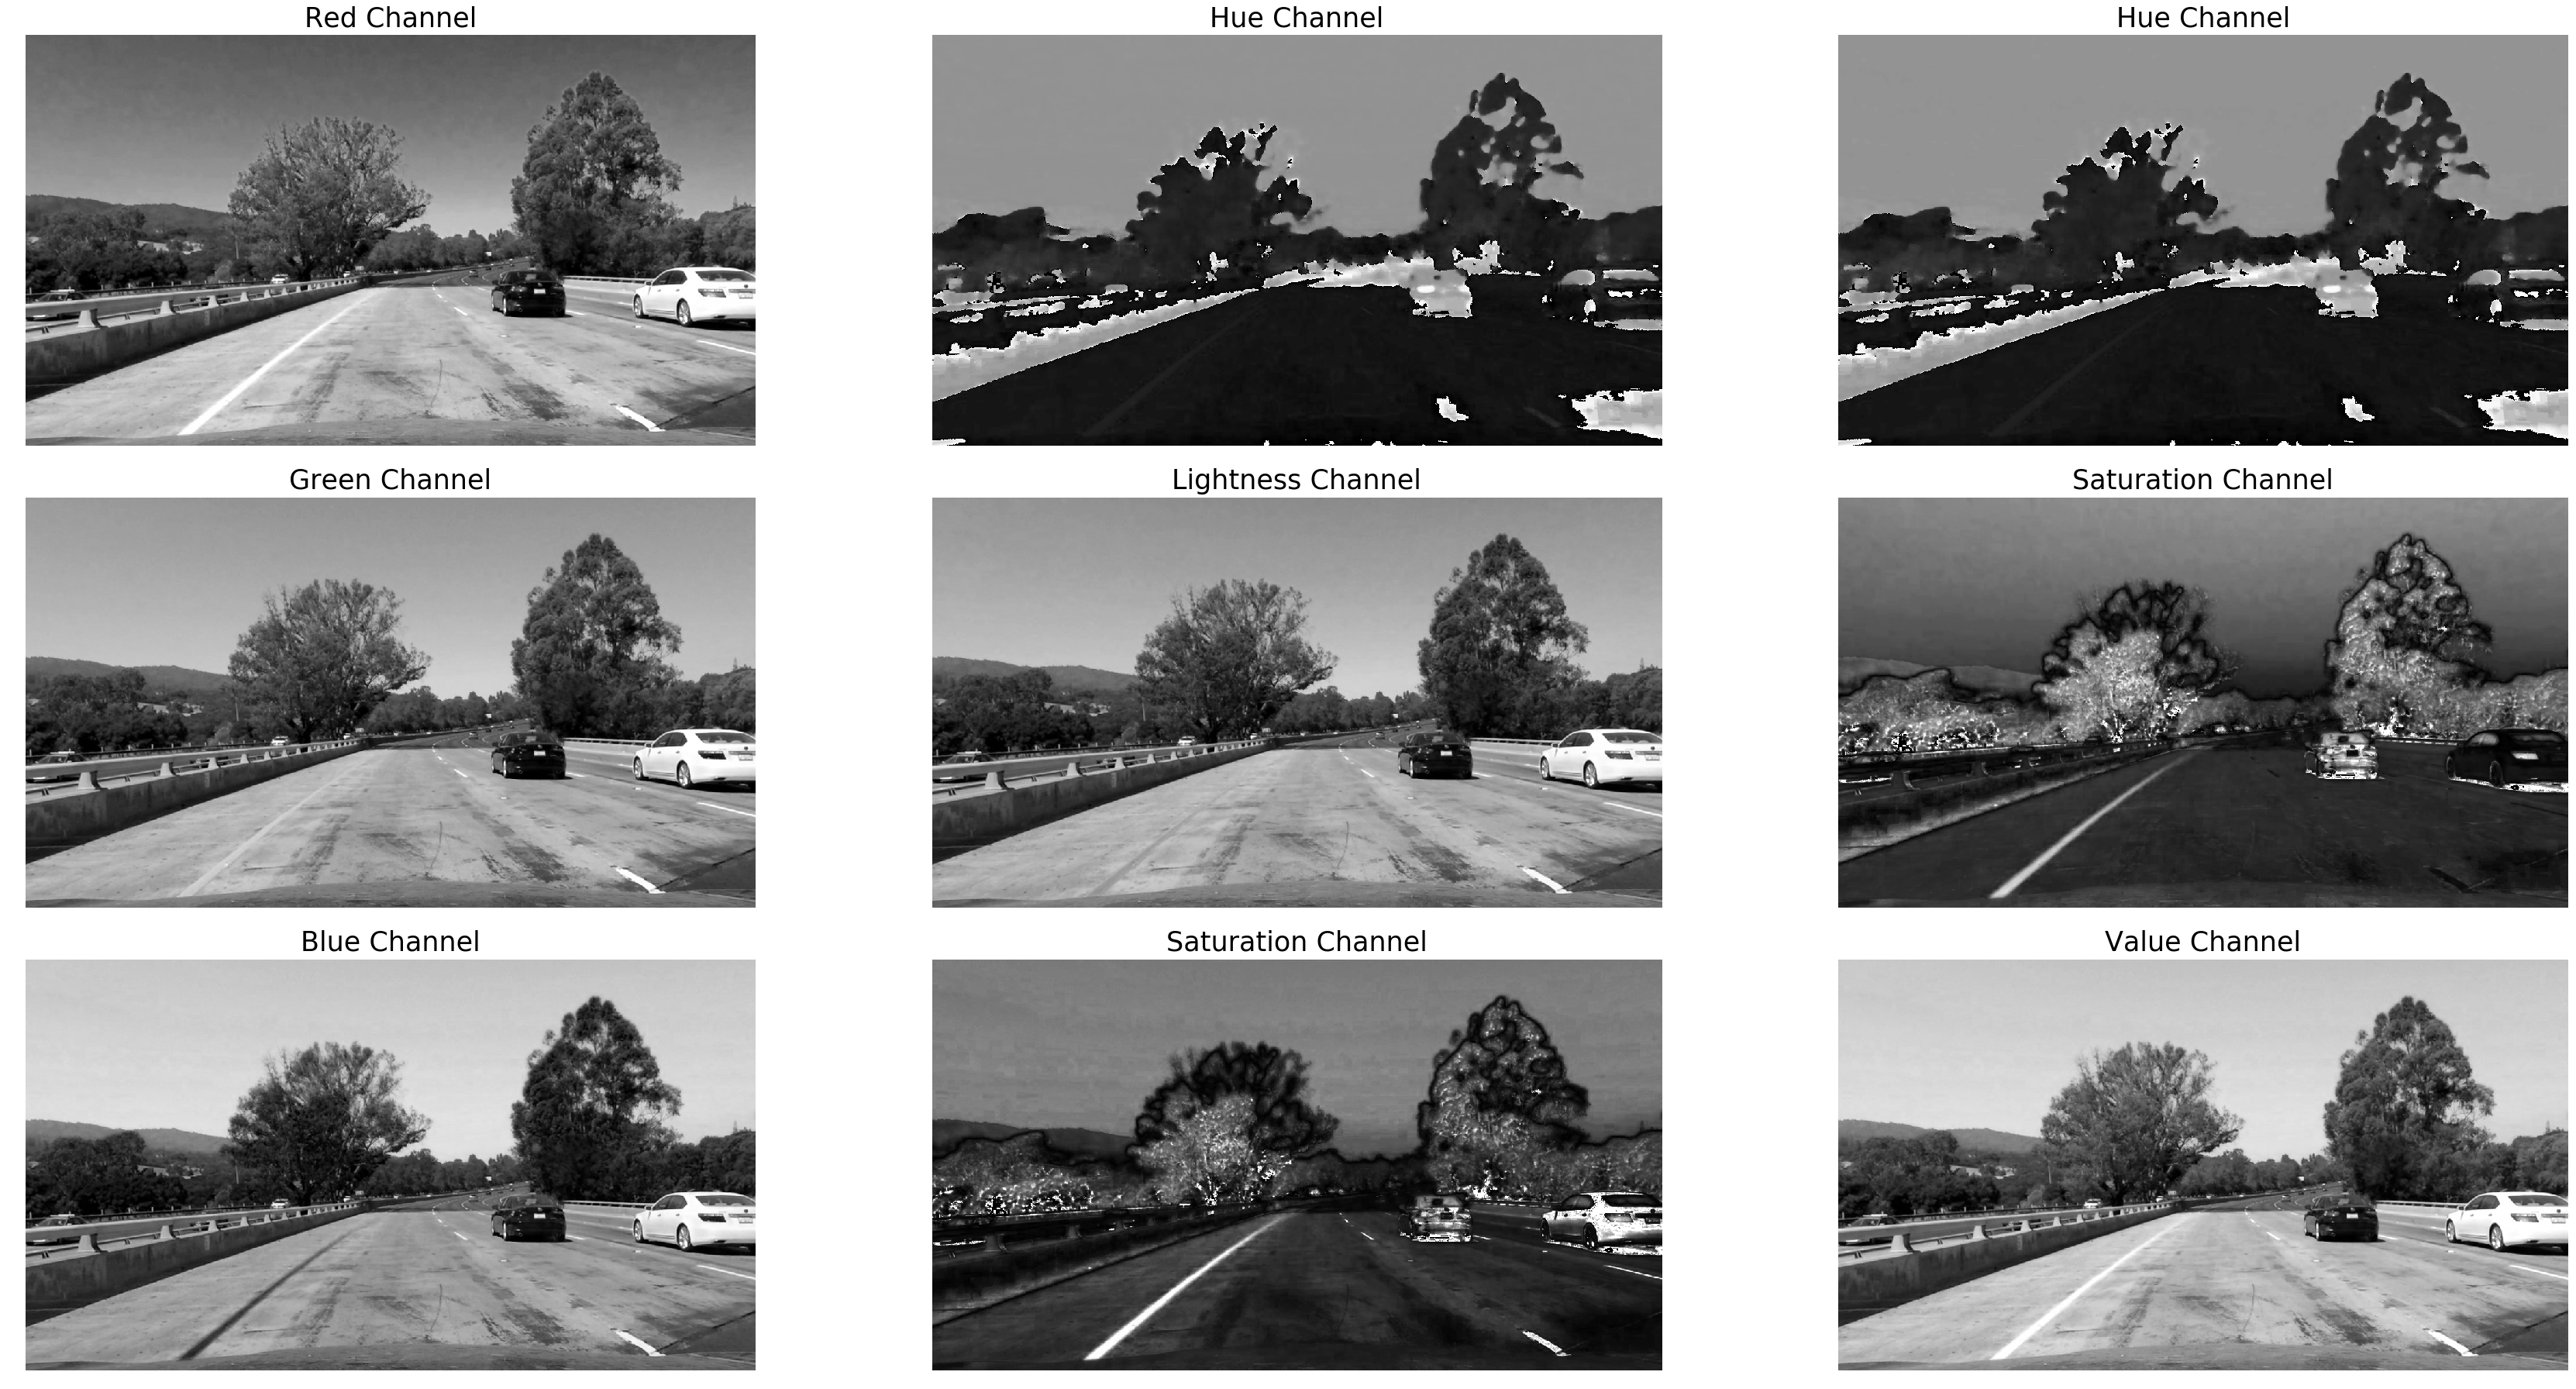

In [19]:
Calibrate(calImages, 10, 7)
img = bgr2rgb(testImages[testIndexes[2]])
undist = Lane(testImages[testIndexes[2]])
imgObj = Image(undist)

rgb = imgObj.Threshold()
hls = imgObj.Threshold(ColorSpace=imgObj.HLS)
hsv = imgObj.Threshold(ColorSpace=imgObj.HSV)

f, (row1, row2, row3) = plt.subplots(3, 3, figsize=(50, 25))

ax1 = row1[0]
ax2 = row2[0]
ax3 = row3[0]

ax1.imshow(rgb[0], cmap='gray')
ax1.set_title('Red Channel', pad=12, fontsize=35)
ax1.axis("off")
ax2.imshow(rgb[1], cmap='gray')
ax2.set_title('Green Channel', pad=12, fontsize=35)
ax2.axis("off")
ax3.imshow(rgb[2], cmap='gray')
ax3.set_title('Blue Channel', pad=12, fontsize=35)
ax3.axis("off")

ax4 = row1[1]
ax5 = row2[1]
ax6 = row3[1]

ax4.imshow(hls[0], cmap='gray')
ax4.set_title('Hue Channel', pad=12, fontsize=35)
ax4.axis("off")
ax5.imshow(hls[1], cmap='gray')
ax5.set_title('Lightness Channel', pad=12, fontsize=35)
ax5.axis("off")
ax6.imshow(hls[2], cmap='gray')
ax6.set_title('Saturation Channel', pad=12, fontsize=35)
ax6.axis("off")

ax7 = row1[2]
ax8 = row2[2]
ax9 = row3[2]

ax7.imshow(hsv[0], cmap='gray')
ax7.set_title('Hue Channel', pad=12, fontsize=35)
ax7.axis("off")
ax8.imshow(hsv[1], cmap='gray')
ax8.set_title('Saturation Channel', pad=12, fontsize=35)
ax8.axis("off")
ax9.imshow(hsv[2], cmap='gray')
ax9.set_title('Value Channel', pad=12, fontsize=35)
ax9.axis("off")

f.tight_layout()

## Testing XYZ, YCrCb, LAB, and LUV color spaces

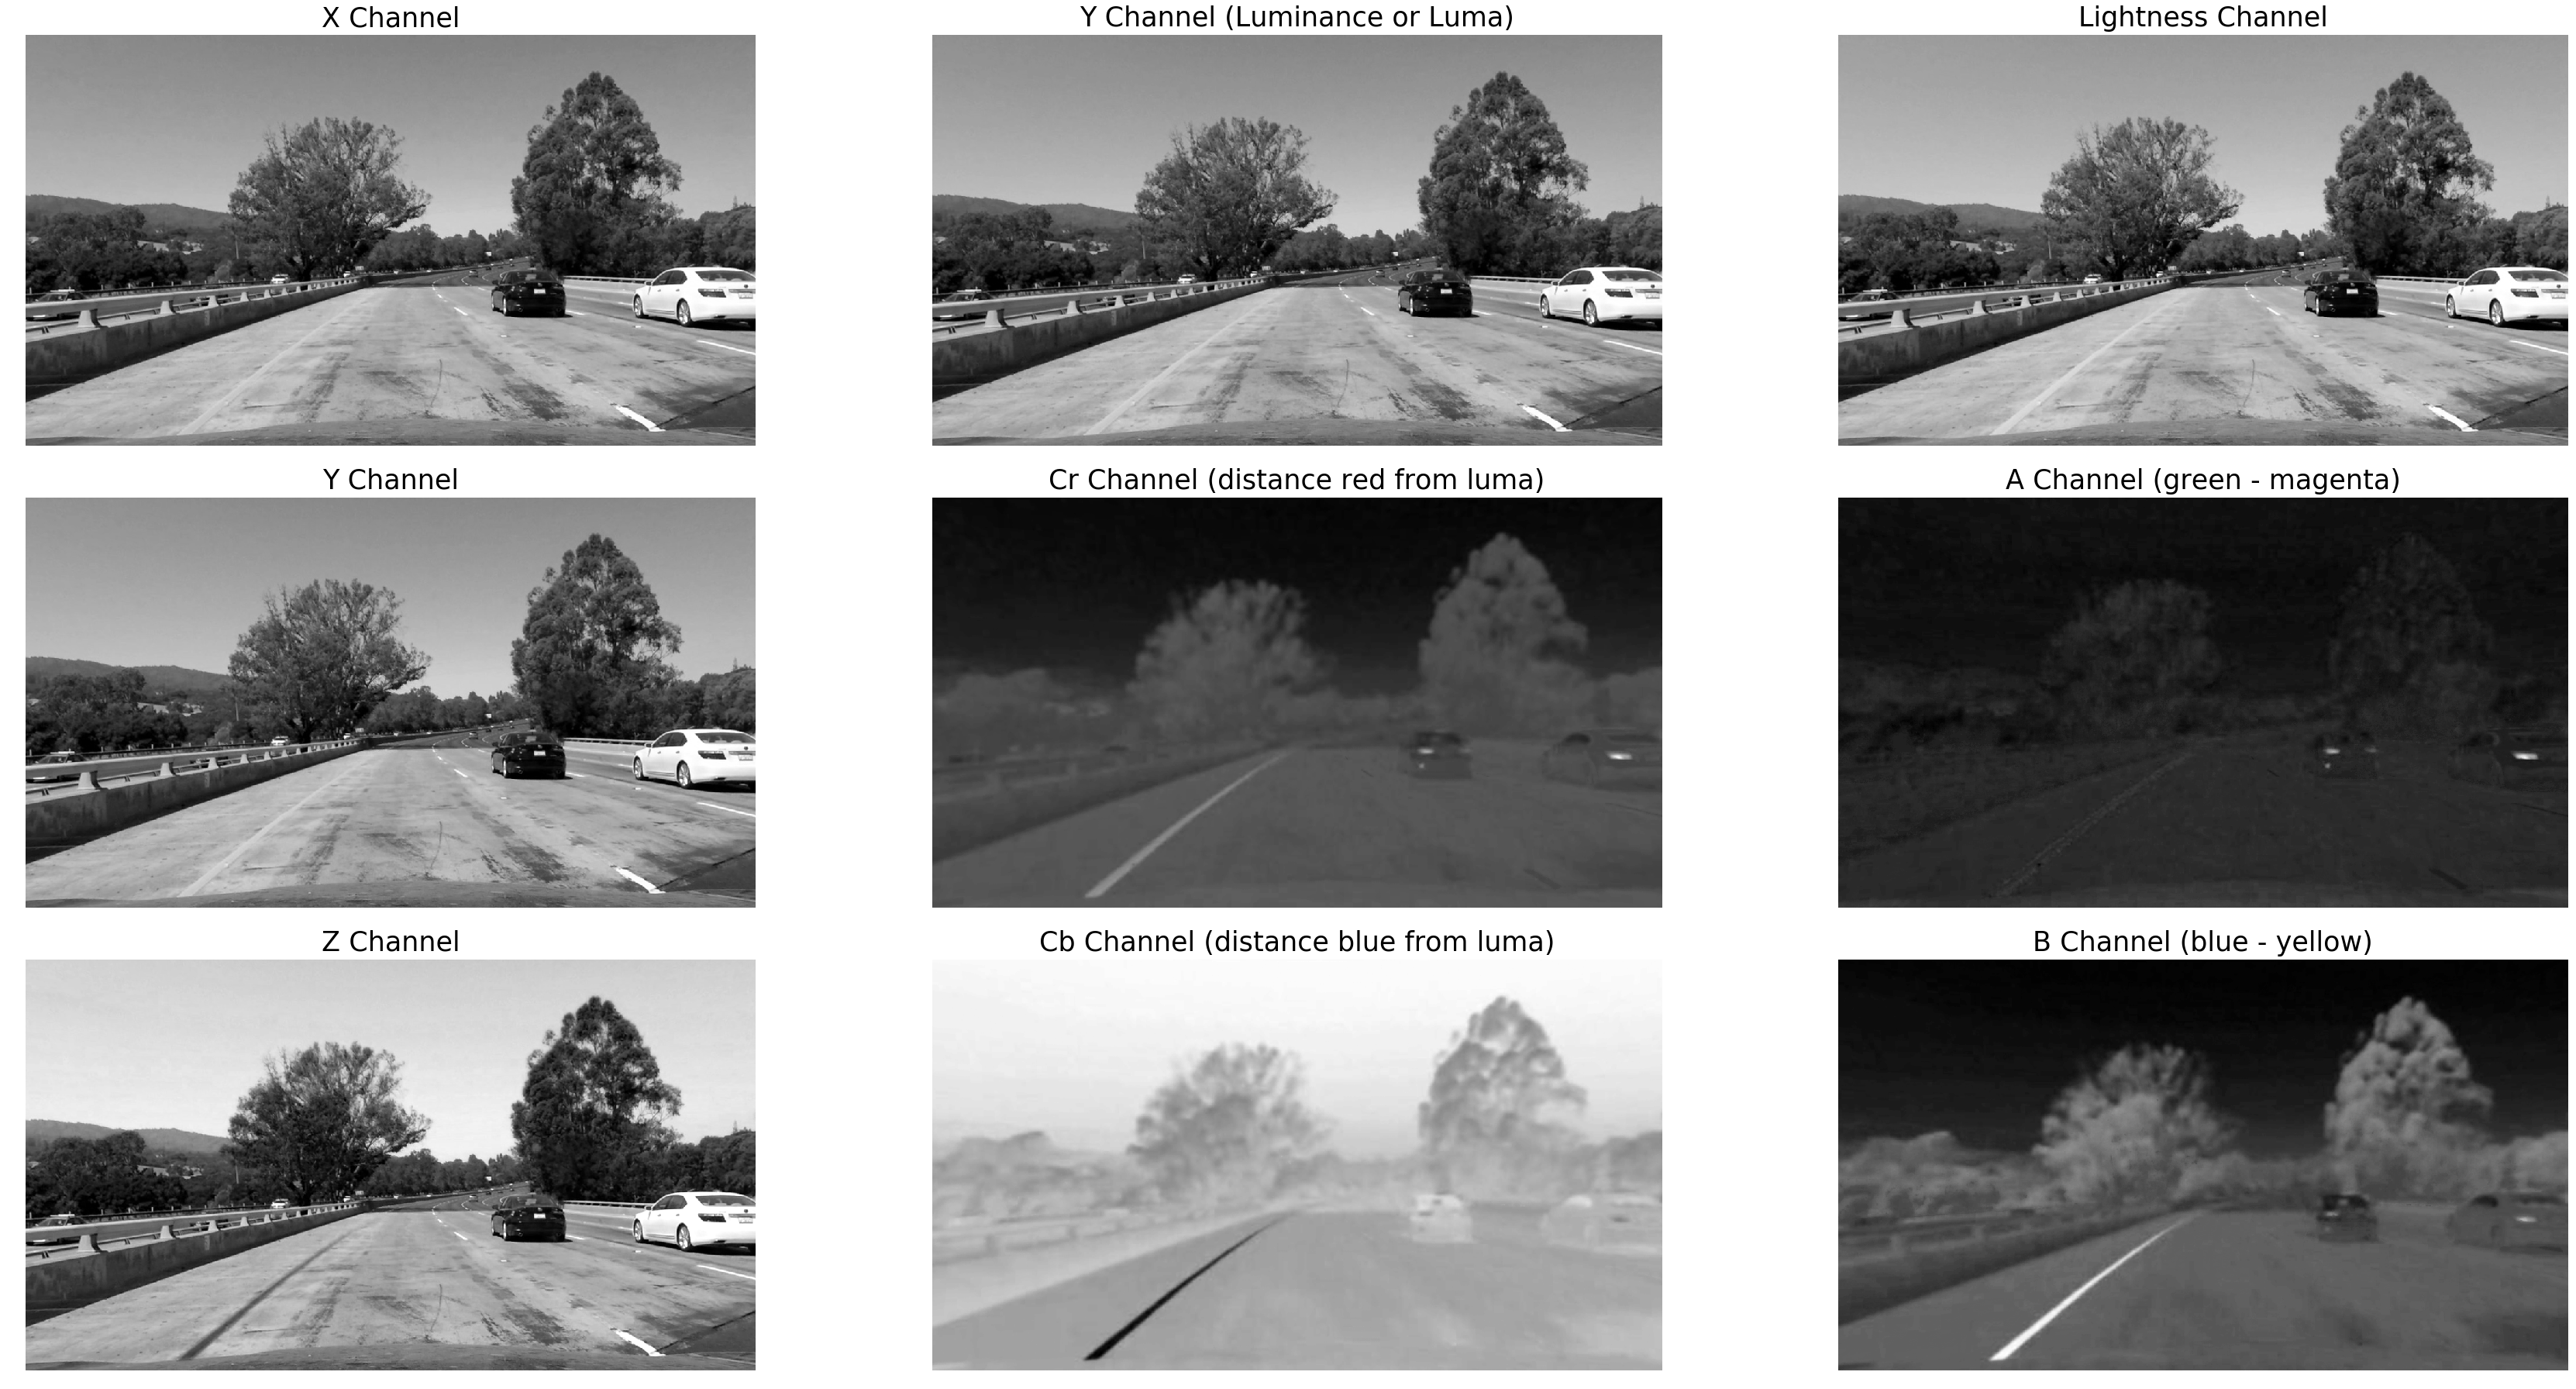

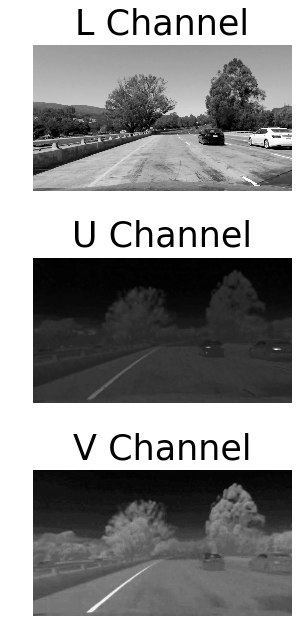

In [20]:
xyz = imgObj.Threshold(ColorSpace=imgObj.XYZ)
ycrcb = imgObj.Threshold(ColorSpace=imgObj.YCRCB)
lab = imgObj.Threshold(ColorSpace=imgObj.LAB)
luv = imgObj.Threshold(ColorSpace=imgObj.LUV)

f, (row1, row2, row3) = plt.subplots(3, 3, figsize=(50, 25))

ax1 = row1[0]
ax2 = row2[0]
ax3 = row3[0]

ax1.imshow(xyz[0], cmap='gray')
ax1.set_title('X Channel', pad=12, fontsize=35)
ax1.axis("off")
ax2.imshow(xyz[1], cmap='gray')
ax2.set_title('Y Channel', pad=12, fontsize=35)
ax2.axis("off")
ax3.imshow(xyz[2], cmap='gray')
ax3.set_title('Z Channel', pad=12, fontsize=35)
ax3.axis("off")

ax4 = row1[1]
ax5 = row2[1]
ax6 = row3[1]

ax4.imshow(ycrcb[0], cmap='gray')
ax4.set_title('Y Channel (Luminance or Luma)', pad=12, fontsize=35)
ax4.axis("off")
ax5.imshow(ycrcb[1], cmap='gray')
ax5.set_title('Cr Channel (distance red from luma)', pad=12, fontsize=35)
ax5.axis("off")
ax6.imshow(ycrcb[2], cmap='gray')
ax6.set_title('Cb Channel (distance blue from luma)', pad=12, fontsize=35)
ax6.axis("off")

ax7 = row1[2]
ax8 = row2[2]
ax9 = row3[2]

ax7.imshow(lab[0], cmap='gray')
ax7.set_title('Lightness Channel', pad=12, fontsize=35)
ax7.axis("off")
ax8.imshow(lab[1], cmap='gray')
ax8.set_title('A Channel (green - magenta)', pad=12, fontsize=35)
ax8.axis("off")
ax9.imshow(lab[2], cmap='gray')
ax9.set_title('B Channel (blue - yellow)', pad=12, fontsize=35)
ax9.axis("off")

f.tight_layout()

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 9))

ax1.imshow(luv[0], cmap='gray')
ax1.set_title('L Channel', pad=12, fontsize=35)
ax1.axis("off")
ax2.imshow(luv[1], cmap='gray')
ax2.set_title('U Channel', pad=12, fontsize=35)
ax2.axis("off")
ax3.imshow(luv[2], cmap='gray')
ax3.set_title('V Channel', pad=12, fontsize=35)
ax3.axis("off")

f.tight_layout()

***

100


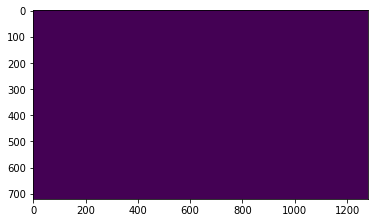

In [23]:
yellow_thres = ((100, 200), (100, 255), None) #rgb
yellow = imgObj.Threshold(thres = yellow_thres)
plt.imshow(yellow[0] & yellow[1])
plt.show()